## Decisive Distributions

### Import Dependencies

In [21]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [24]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

### Read in stock data using Alpaca API

In [26]:
# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

#start_date = (pd.to_datetime('today').date() - pd.DateOffset(years=1)).isoformat()
#end_date = pd.to_datetime('today').isoformat()

# Set the stock tickers
# YOUR CODE HERE!
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]

# Get 1 year's worth of historical data for all stocks
# HINT: Set "limit" to 10000 so all ticker rows are captured from get_bars()
# YOUR CODE HERE!
stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    limit=10000,
    start=start_date,
    end=end_date
).df


# Display sample data
stock_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-01 04:00:00+00:00,210.20,215.3100,209.230,210.52,64827505,441450,212.670859,AAPL
2019-05-02 04:00:00+00:00,209.65,212.6500,208.130,209.15,32000324,233410,210.155469,AAPL
2019-05-03 04:00:00+00:00,210.78,211.8400,210.230,211.75,21092378,148449,211.161771,AAPL
2019-05-06 04:00:00+00:00,204.16,208.8400,203.500,208.48,32444375,236173,207.309513,AAPL
2019-05-07 04:00:00+00:00,205.86,207.4175,200.825,202.86,38763698,294532,203.568951,AAPL
...,...,...,...,...,...,...,...,...
2020-04-27 04:00:00+00:00,26.41,27.8700,26.380,27.31,12846456,58687,27.275657,WORK
2020-04-28 04:00:00+00:00,28.50,28.5000,26.150,26.88,13150333,57716,26.997637,WORK
2020-04-29 04:00:00+00:00,26.30,27.3300,25.020,27.07,12889695,62526,26.640053,WORK


In [31]:
# Reorganize the DataFrame
# Separate ticker data
SPY = stock_data[stock_data['symbol']=='SPY'].drop('symbol', axis=1)
LUV = stock_data[stock_data['symbol']=='LUV'].drop('symbol', axis=1)
DIS = stock_data[stock_data['symbol']=='DIS'].drop('symbol', axis=1)
AAPL = stock_data[stock_data['symbol']=='AAPL'].drop('symbol', axis=1)
SBUX = stock_data[stock_data['symbol']=='SBUX'].drop('symbol', axis=1)
WORK = stock_data[stock_data['symbol']=='WORK'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
portfolio=pd.concat([SPY,LUV,DIS,AAPL,SBUX,WORK], axis=1, keys=['SPY','LUV','DIS','AAPL','SBUX','WORK'])

# Display sample data
portfolio

SPY                                         \
                             open      high       low   close     volume   
timestamp                                                                  
2019-05-01 04:00:00+00:00  294.76  294.9500  291.8000  291.81   71921870   
2019-05-02 04:00:00+00:00  291.68  292.7000  289.5200  291.18   65058183   
2019-05-03 04:00:00+00:00  292.80  294.3400  291.2998  294.03   56579556   
2019-05-06 04:00:00+00:00  289.24  293.3100  288.9000  292.82  107250892   
2019-05-07 04:00:00+00:00  290.15  290.8100  285.8100  287.93  145292657   
...                           ...       ...       ...     ...        ...   
2020-04-27 04:00:00+00:00  285.02  288.2700  284.6200  287.05   78438758   
2020-04-28 04:00:00+00:00  291.00  291.4000  285.4000  285.73  106308658   
2020-04-29 04:00:00+00:00  291.59  294.8800  290.4100  293.21  118773506   
2020-04-30 04:00:00+00:00  291.69  293.3239  288.5900  290.48  123004196   
2020-05-01 04:00:00+00:00  285.16  290.6572  281.5200  282.79  125180028   

                                                     LUV                  ...  \
                          trade_count        vwap   open    high     low  ...   
timestamp                                                                 ...   
2019-05-01 04:00:00+00:00      337374  293.457138  54.60  54.610  53.855  ...   
2019-05-02 04:00:00+00:00      342564  291.101680  53.99  54.490  53.360  ...   
2019-05-03 04:00:00+00:00      249557  293.438891  53.54  53.930  53.285  ...   
2019-05-06 04:00:00+00:00      390959  291.952803  52.81  53.610  52.720  ...   
2019-05-07 04:00:00+00:00      618594  288.280747  53.04  53.120  51.450  ...   
...                               ...         ...    ...     ...     ...  ...   
2020-04-27 04:00:00+00:00      430208  286.528977  29.64  29.910  28.850  ...   
2020-04-28 04:00:00+00:00      582617  287.789471  29.10  30.480  28.250  ...   
2020-04-29 04:00:00+00:00      643393  292.698945  29.50  31.795  29.430  ...   
2020-04-30 04:00:00+00:00      650786  290.584102  30.78  31.690  30.180  ...   
2020-05-01 04:00:00+00:00      639987  284.092832  30.50  30.955  28.750  ...   

                               SBUX                          WORK         \
                             volume trade_count       vwap   open   high   
timestamp                                                                  
2019-05-01 04:00:00+00:00   6678194       50558  77.684302    NaN    NaN   
2019-05-02 04:00:00+00:00   6247550       50730  77.272023    NaN    NaN   
2019-05-03 04:00:00+00:00   4967928       39845  78.009787    NaN    NaN   
2019-05-06 04:00:00+00:00   5607843       46777  77.731052    NaN    NaN   
2019-05-07 04:00:00+00:00   8115808       71206  78.051332    NaN    NaN   
...                             ...         ...        ...    ...    ...   
2020-04-27 04:00:00+00:00   8258468       83179  77.519663  26.41  27.87   
2020-04-28 04:00:00+00:00  12801646      118914  78.649998  28.50  28.50   
2020-04-29 04:00:00+00:00  24575514      215136  77.410957  26.30  27.33   
2020-04-30 04:00:00+00:00  15186035      136684  76.323302  27.02  27.63   
2020-05-01 04:00:00+00:00  11216705      119521  74.024700  26.18  26.88   

                                                                            
                             low  close      volume trade_count       vwap  
timestamp                                                                   
2019-05-01 04:00:00+00:00    NaN    NaN         NaN         NaN        NaN  
2019-05-02 04:00:00+00:00    NaN    NaN         NaN         NaN        NaN  
2019-05-03 04:00:00+00:00    NaN    NaN         NaN         NaN        NaN  
2019-05-06 04:00:00+00:00    NaN    NaN         NaN         NaN        NaN  
2019-05-07 04:00:00+00:00    NaN    NaN         NaN         NaN        NaN  
...                          ...    ...         ...         ...        ...  
2020-04-27 04:00:00+00:00  26.38  27.31  12846456.0     58687.0  27.2756

### Create a new DataFrame and store the closing prices of each stock.

In [34]:
# Create and empty DataFrame for closing prices
closing_prices = pd.DataFrame()

# Fetch the closing prices for all the tickers ['SPY','LUV','DIS','AAPL','SBUX','WORK']
# YOUR CODE HERE! 
closing_prices['SPY'] = portfolio['SPY']['close']
closing_prices['LUV'] = portfolio['LUV']['close']
closing_prices['DIS'] = portfolio['DIS']['close']
closing_prices['AAPL'] = portfolio['AAPL']['close']
closing_prices['SBUX'] = portfolio['SBUX']['close']
closing_prices['WORK'] = portfolio['WORK']['close']

# Drop the time component of the date
closing_prices.index = closing_prices.index.date

# Display sample data
closing_prices

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-05-01,291.81,53.90,136.38,210.52,77.52,NaN
2019-05-02,291.18,53.37,134.14,209.15,77.47,NaN
2019-05-03,294.03,53.62,134.33,211.75,78.05,NaN
2019-05-06,292.82,53.48,135.00,208.48,78.06,NaN
2019-05-07,287.93,52.21,133.44,202.86,77.96,NaN
...,...,...,...,...,...,...
2020-04-27,287.05,29.11,106.06,283.17,77.74,27.31
2020-04-28,285.73,29.69,106.21,278.58,78.69,26.88
2020-04-29,293.21,30.97,112.25,287.73,76.86,27.07
2020-04-30,290.48,31.25,108.15,293.80,76.73,26.69


### Calculate the daily returns for each stock using the `pct_change()` function

In [36]:
# Compute daily returns
# YOUR CODE HERE!
daily_returns = closing_prices.pct_change().dropna()
# Display sample data
daily_returns.head()

,SPY,LUV,DIS,AAPL,SBUX,WORK
2019-06-21,-0.006287,-0.005241,-0.012604,-0.003409,-0.010273,-0.036251
2019-06-24,-0.001224,-0.000585,-0.007202,-0.001006,-0.002028,-0.039226
2019-06-25,-0.009808,-0.004295,0.005172,-0.015158,0.007173,-0.015660
2019-06-26,-0.000997,-0.005882,0.003287,0.021629,-0.010326,0.056534
2019-06-27,0.003546,0.000789,-0.007835,-0.000300,0.002159,-0.025276


### Plot Distributions

<AxesSubplot:ylabel='Frequency'>

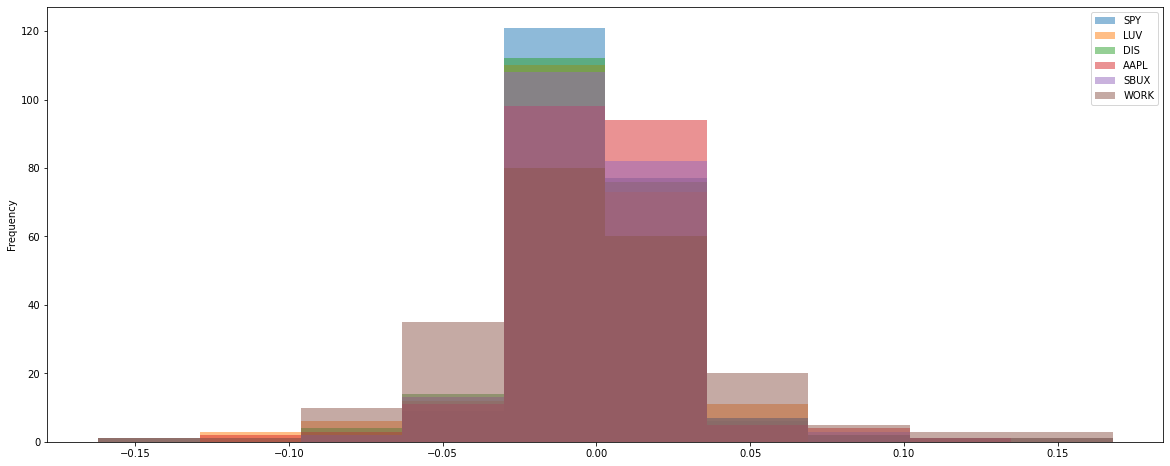

In [40]:
# Visualize the distribution of daily returns across all stocks using a histogram plot
# Hint: To make the plot easier to read, set the alpha argument to 0.5
# YOUR CODE HERE!
daily_returns.plot.hist(alpha=.5,figsize=(20,8))


<AxesSubplot:ylabel='Density'>

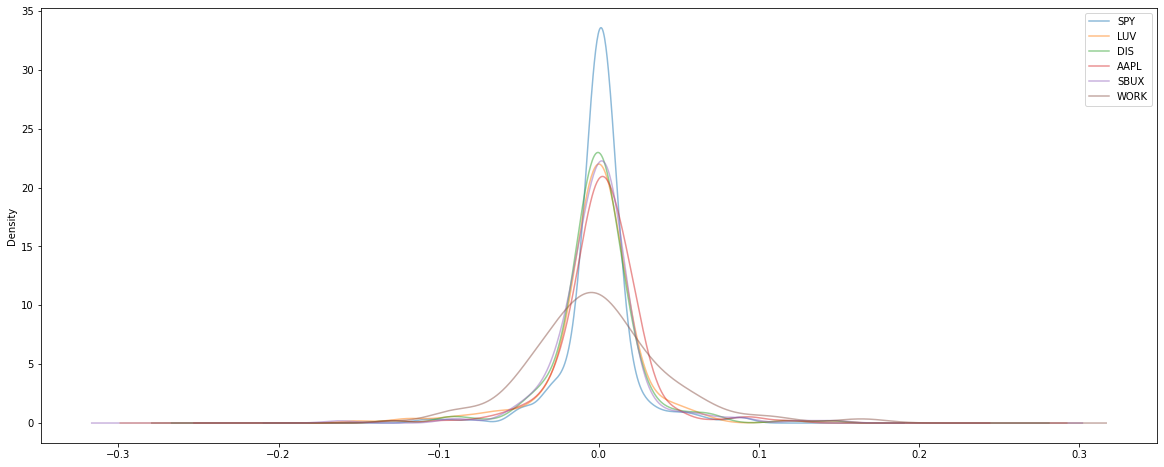

In [44]:
# Visualize the distribution of daily returns across all stocks using a density plot
# YOUR CODE HERE!
daily_returns.plot.density(alpha=.5, figsize=(20,8))